Q1: Anomaly Detection and its types
Anomaly detection is the process of identifying data points, events, or observations that deviate significantly from the expected pattern of a dataset. These anomalies often correspond to rare events such as fraud, faults, or sudden behavior changes.
​

Point anomaly: A single data point that is very different from the rest of the data.
​
Example: A credit card transaction of 5,00,000 INR for a customer who usually spends under 5,000 INR.
​

Contextual anomaly: A data point that is normal in general but abnormal in a specific context (time, location, condition).
​
Example: 30°C is normal in summer but anomalous in winter in Delhi.
​

Collective anomaly: A group of points that together behave abnormally, even if individual points look normal.
​
Example: A continuous series of slightly higher-than-normal network requests indicating a DDoS attack.
​

Q2: Isolation Forest vs DBSCAN vs LOF
All three are unsupervised outlier detection methods but use different concepts
| Aspect             | Isolation Forest                                                                           | DBSCAN                                                                                 | Local Outlier Factor (LOF)                                                                                |
| ------------------ | ------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| Core idea          | Randomly isolate points in trees; anomalies are isolated with fewer splits. eprints.soton​ | Density-based clustering; points in low-density regions (noise) are outliers. kellton​ | Compares local density of a point to densities of its neighbors. eprints.soton​                           |
| Type of outliers   | Good for global anomalies. linkedin​                                                       | Good for global anomalies and cluster-shaped patterns. linkedin​                       | Good for local anomalies where neighborhood density changes. linkedin​                                    |
| Parameters         | Number of trees, contamination. scikit-learn​                                              | Epsilon (eps), min_samples. kellton​                                                   | n_neighbors, contamination. scikit-learn​                                                                 |
| Scalability        | Very scalable on large, high-dimensional data. lirias.kuleuven​                            | Struggles on very high-dimensional or very large data. lirias.kuleuven​                | More expensive; needs nearest neighbors search. scikit-learn​                                             |
| Suitable use cases | High-dimensional tabular data, large datasets, generic anomaly detection. scikit-learn​    | Spatial data, clustering with outlier detection (e.g., GPS, geodata). kellton​         | Detect local anomalies in data with varying density, e.g., fraud in specific customer segments. linkedin​ |

In summary, Isolation Forest is often the first choice for large tabular data, DBSCAN is preferred when clustering structure matters, and LOF is best when local density variations are critical

Q3: Key components of a time series
A time series is a sequence of observations indexed by time. Its key components are:
​

Trend: Long-term upward or downward movement in the series.
​
Example: Steadily increasing number of airline passengers over years in the AirPassengers dataset.
​

Seasonality: Regular, repeating patterns at fixed periods (daily, weekly, yearly).
​
Example: Monthly airline passengers peaking every summer and December.
​

Cyclical component: Fluctuations with no fixed period, often related to economic or business cycles.
​
Example: Multi-year ups and downs in GDP growth rates.
​

Irregular or residual (noise): Random, unpredictable variations that remain after removing trend and seasonality.
​
Example: Sudden spike or drop in passengers due to a strike or one-off event.
​

Q4: Stationarity and how to achieve it
A time series is stationary if its statistical properties such as mean, variance, and autocovariance are constant over time. Many models like ARIMA assume stationarity for valid inference and forecasting.
​

Testing stationarity:

Visual inspection: Plot the series to check if mean and variance appear stable over time.
​

Statistical tests: Augmented Dickey–Fuller (ADF) test or KPSS test.
​

ADF: Null hypothesis is “series has a unit root (non-stationary)”.
​

Transforming non-stationary to stationary:

Differencing: Use first or seasonal differencing
y
t
−
y
t
−
1
y
t
 −y
t−1
  or
y
t
−
y
t
−
s
y
t
 −y
t−s
  to remove trend/seasonality.
​

Log/Box–Cox transform: Stabilize variance with log or power transforms.
​

Detrending: Fit a regression on time and subtract the fitted trend.
​

Q5: AR, MA, ARIMA, SARIMA, SARIMAX
All are linear time series models built around past values and/or past errors.
​

AR (AutoRegressive): Current value depends on past values.
​
Example: AR(p):
y
t
=
c
+
∑
i
=
1
p
ϕ
i
y
t
−
i
+
ϵ
t
y
t
 =c+∑
i=1
p
 ϕ
i
 y
t−i
 +ϵ
t
 .
​
Use when autocorrelation decays gradually.
​

MA (Moving Average): Current value depends on past errors (shocks).
​
Example: MA(q):
y
t
=
c
+
∑
i
=
1
q
θ
i
ϵ
t
−
i
+
ϵ
t
y
t
 =c+∑
i=1
q
 θ
i
 ϵ
t−i
 +ϵ
t
 .
​
Use when autocorrelation cuts off after some lag.
​

ARIMA (p, d, q): AR + differencing + MA; for non-seasonal series.
​
Structure: Apply differencing order
d
d, then fit ARMA(p, q).
​
Use for non-seasonal but non-stationary data (trend).
​

SARIMA (p, d, q)(P, D, Q)_s: ARIMA with seasonal AR, MA, and seasonal differencing.
​
Suitable for data with clear seasonality (e.g., monthly AirPassengers).
​

SARIMAX: SARIMA with exogenous variables (X), allowing external regressors such as weather, promotions, holidays.
​
Use when external factors influence the series (e.g., electricity demand with temperature).
​

Q6: Decompose AirPassengers time series
Task: Load AirPassengers, plot, and decompose into trend, seasonality, residuals.
​

Conceptual steps:

Load dataset, parse dates, set monthly frequency.
​

Plot original series to visualize upward trend and monthly seasonality.
​

Use additive or multiplicative decomposition to extract trend, seasonal, and residual components

/tmp/ipython-input-2947488914.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start='1949-01-01', periods=len(data), freq='M')


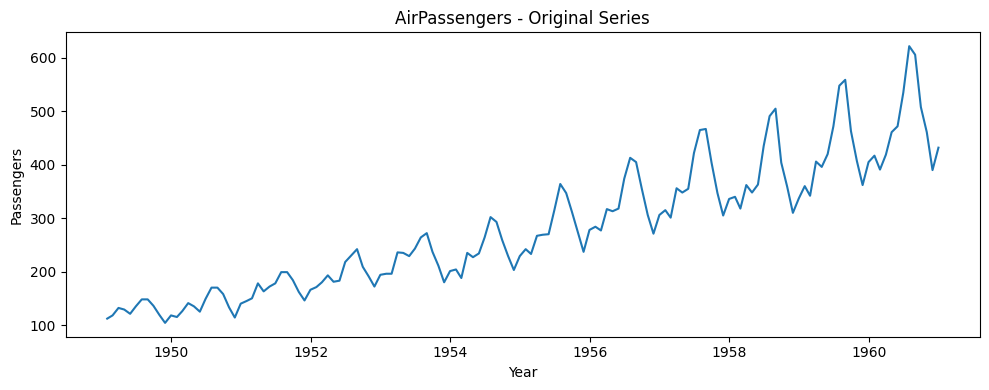

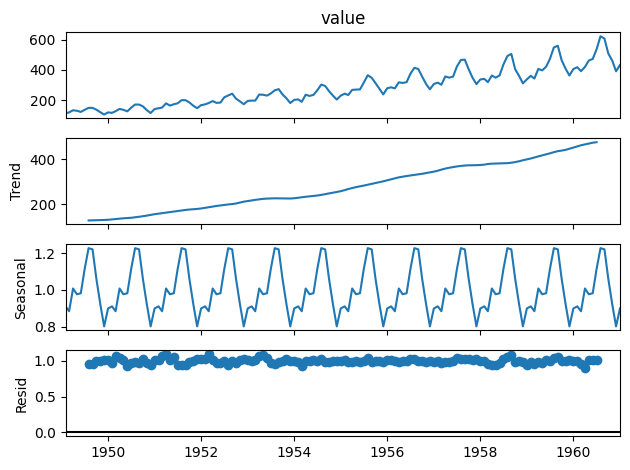

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load AirPassengers (alternative sources)
data = get_rdataset('AirPassengers').data
data['Month'] = pd.to_datetime(data['time'], format='%Y')
data.index = pd.date_range(start='1949-01-01', periods=len(data), freq='M')
ts = data['value']  # passenger counts

plt.figure(figsize=(10, 4))
plt.plot(ts)
plt.title('AirPassengers - Original Series')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.tight_layout()
plt.show()

result = seasonal_decompose(ts, model='multiplicative', period=12)

result.plot()
plt.tight_layout()
plt.show()


Q7: Isolation Forest on NYC Taxi Fare (2D scatter)
Task: Detect anomalies using Isolation Forest and visualize them.
​

Conceptual steps:

Load NYC Taxi Fare dataset and select numeric features such as fare_amount and trip_distance.
​

Fit IsolationForest with suitable contamination (e.g., 0.01).
​

Predict anomalies and plot a scatter where color indicates inlier vs outlier.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Example: use only two numeric columns for visualization
X = df[['fare_amount', 'trip_distance']].dropna()

iso = IsolationForest(contamination=0.01, random_state=42)
labels = iso.fit_predict(X)  # 1 = inlier, -1 = outlier

X['anomaly'] = labels

plt.figure(figsize=(8, 6))
normal = X[X['anomaly'] == 1]
outliers = X[X['anomaly'] == -1]

plt.scatter(normal['trip_distance'], normal['fare_amount'],
            s=5, c='blue', label='Normal')
plt.scatter(outliers['trip_distance'], outliers['fare_amount'],
            s=10, c='red', label='Anomaly')

plt.xlabel('Trip distance')
plt.ylabel('Fare amount')
plt.title('Isolation Forest - NYC Taxi Fare Anomalies')
plt.legend()
plt.tight_layout()
plt.show()


Q8: Train SARIMA on airline passengers and forecast 12 months
Task: Use SARIMA on monthly airline passengers and forecast next 12 months.
​

Conceptual steps:

Use AirPassengers monthly series with clear trend and seasonality.
​

Identify seasonal period
s
=
12
s=12 and reasonable (p, d, q)(P, D, Q)_12, such as (1,1,1)(1,1,1)_12.
​

Fit SARIMA, generate 12-step-ahead forecast, and plot

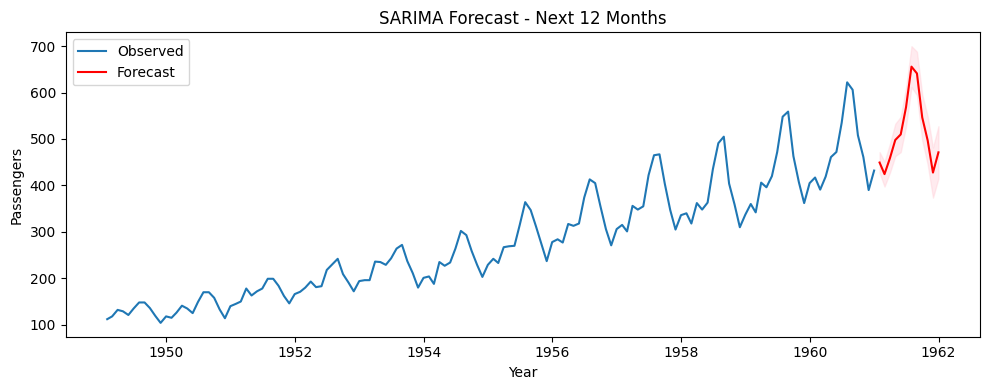

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assume ts is the monthly AirPassengers time series (from Q6)
model = SARIMAX(ts,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 4))
plt.plot(ts, label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast - Next 12 Months')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.tight_layout()
plt.show()


Q9: Local Outlier Factor (LOF) on any numerical dataset
Task: Apply LOF to detect anomalies and visualize.
​

Conceptual steps:

Choose any numerical dataset (e.g., two numeric features from a CSV).
​

Fit LocalOutlierFactor with suitable n_neighbors and contamination.
​

Get labels and plot 2D scatter with anomalies in a different color

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Example dataset: two numeric columns
X = df[['feature1', 'feature2']].dropna()

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)  # 1 = inlier, -1 = outlier

X['anomaly'] = labels

plt.figure(figsize=(8, 6))
normal = X[X['anomaly'] == 1]
outliers = X[X['anomaly'] == -1]

plt.scatter(normal['feature1'], normal['feature2'],
            s=5, c='blue', label='Normal')
plt.scatter(outliers['feature1'], outliers['feature2'],
            s=10, c='red', label='Anomaly')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Local Outlier Factor - Anomaly Detection')
plt.legend()
plt.tight_layout()
plt.show()


Q10: Real-time power grid monitoring workflow
Task: Explain workflow for anomaly detection + short-term forecasting on streaming 15-minute power data (with timestamp, region, weather, usage).
​

a) Detect anomalies in streaming data
Feature engineering:

Create time-based features (hour of day, day of week, holidays).
​

Include weather variables (temperature, humidity, etc.).
​

Model choice:

Isolation Forest or DBSCAN for global spikes or drops in aggregated features.
​

LOF when local patterns differ per region or weather regime.
​

Implement in micro-batches (e.g., every 5–15 minutes) or with a streaming framework.

Implementation outline:

Maintain a sliding window (e.g., last 7 days) as reference for “normal” behavior.
​

Fit or update anomaly model on window and score new observations as they arrive.
​

Trigger alerts and log anomalies for investigation.
​

b) Time series model for short-term forecasting
At 15-minute resolution with strong daily and weekly seasonal patterns, use SARIMA or SARIMAX.
​

SARIMA captures time-based seasonal patterns (e.g., 96 steps per day).
​

SARIMAX can include exogenous variables like temperature, humidity, and special events (festivals, sports).
​

Example use:

Per region, fit SARIMAX with energy usage as the dependent variable and weather + calendar features as exogenous regressors.
​

c) Validation and performance monitoring
Offline validation:

Train-test split respecting time order (rolling or expanding window).
​

Metrics: MAE, RMSE, MAPE for forecasts; precision, recall, and F1 for anomaly detection.
​

Online monitoring:

Track forecast error over time and set thresholds for retraining.
​

Monitor false positives/negatives of anomalies and adjust contamination, thresholds, or model choice.
​

Use dashboards to visualize demand, forecasts, and anomalies in real time.

d) Business impact
Better load forecasting allows efficient generation scheduling, reducing fuel cost and reliance on expensive peak generators.
​

Early detection of abnormal spikes or drops helps:

Prevent outages or overload events.
​

Detect equipment failures or sudden load loss.
​

Improve demand response planning and grid reliability.
​

This end-to-end system supports operational decision-making, cost optimization, and reliability improvement in the power grid